# HEART DISEASE PREDICTION
# Objective: Predict heart disease risk using UCI dataset

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.7 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.6 MB/s eta 0:00:03
   ---------------- -------------

In [33]:
from sklearn.preprocessing import LabelEncoder

## 2. Load Dataset

In [20]:
df = pd.read_csv("heart_disease_uci.csv")

In [21]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [23]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## 3. Data Cleaning & Preprocessing

### Drop irrelevant columns

In [25]:
df.drop(['id', 'dataset'], axis=1, inplace=True)

### Identify numerical and categorical columns

In [28]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

### Fill missing numerical values with median

In [29]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

### Fill missing categorical values with mode

In [30]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\TJ\AppData\Local\Temp\ipykernel_12392\1925696021.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


### Encode categorical variables

In [34]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### Convert target to binary (0 = no disease, 1 = disease)

In [35]:
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df.drop('num', axis=1, inplace=True)

### Check final dataset

In [45]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
 13  target    920 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 100.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. Exploratory Data Analysis (EDA)

### Class distribution

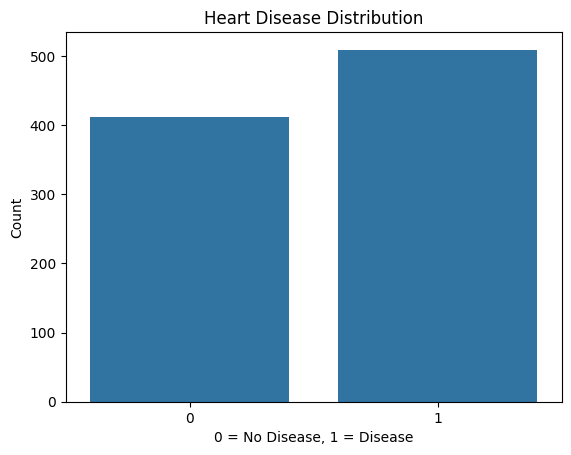

In [49]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

### Age distribution vs target

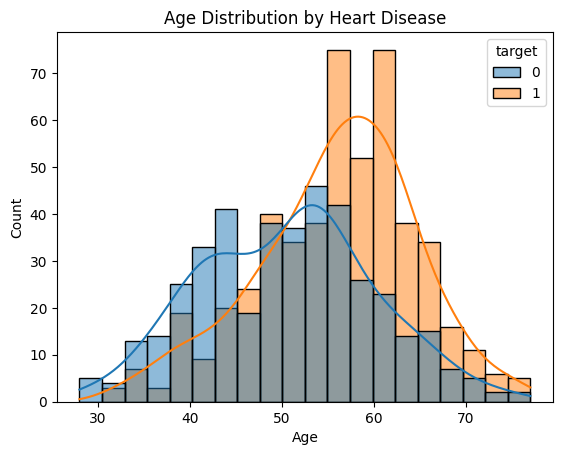

In [50]:
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Chest pain type vs target

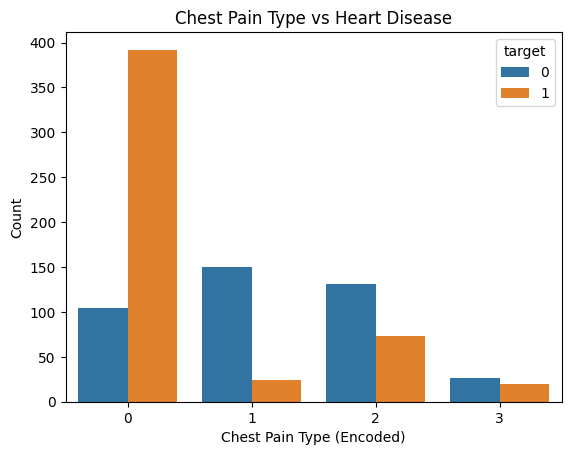

In [54]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (Encoded)")
plt.ylabel("Count")
plt.show()

### Correlation heatmap

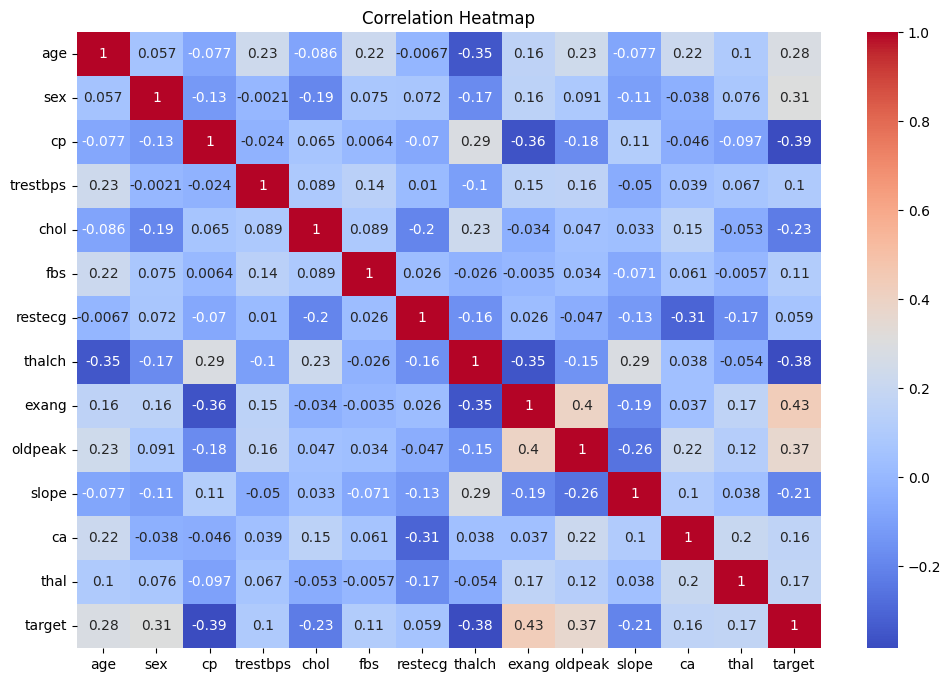

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

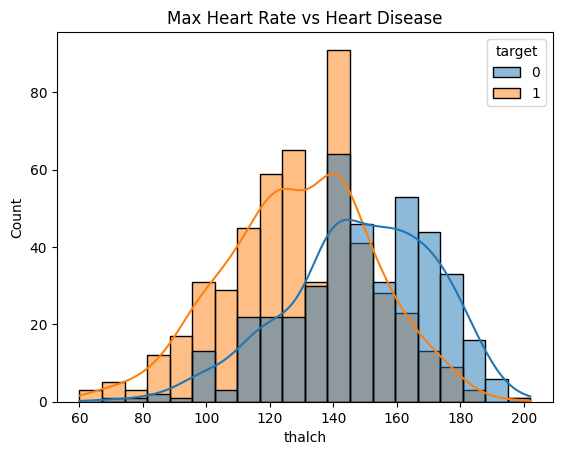

In [55]:
sns.histplot(data=df, x='thalch', hue='target', bins=20, kde=True)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

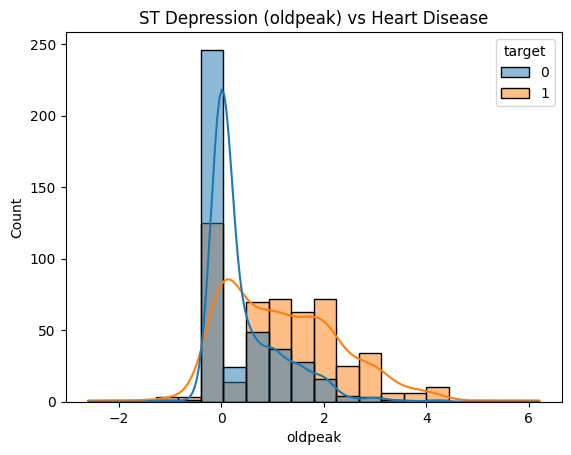

In [56]:
sns.histplot(data=df, x='oldpeak', hue='target', bins=20, kde=True)
plt.title("ST Depression (oldpeak) vs Heart Disease")
plt.show()

# 5. Model Training & Evaluation

### Split dataset

In [57]:
X = df.drop('target', axis=1)
y = df['target']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scale numerical features

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [60]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

### Drcision Tree

In [61]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:,1]

In [62]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.8206521739130435
Decision Tree Accuracy: 0.7717391304347826


### Confusion matrix

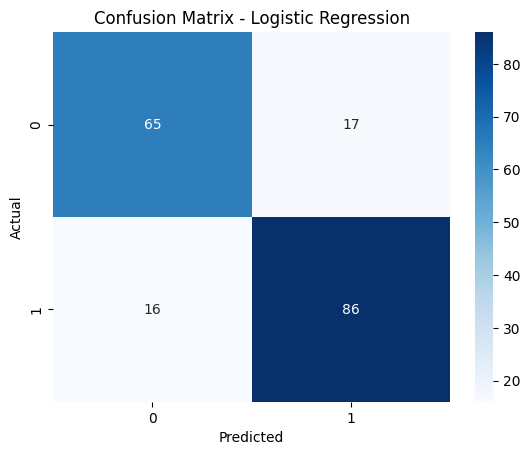

In [63]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

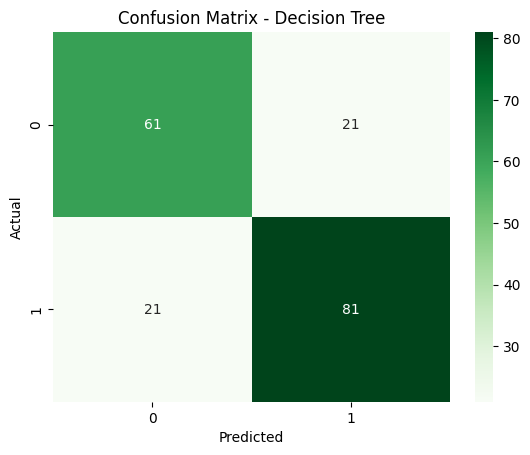

In [64]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

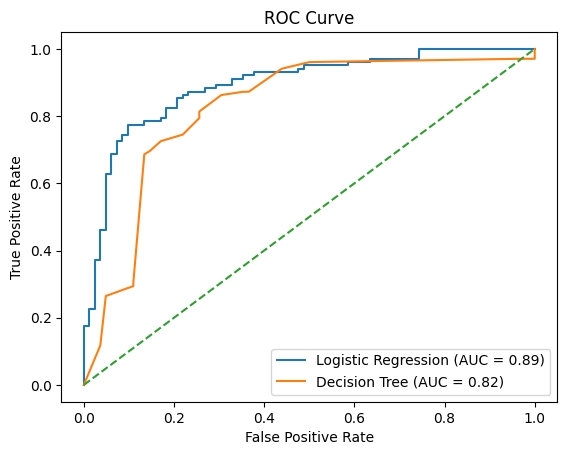

In [66]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 6. Feature Importance

### Logistic Regression coefficients

In [67]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
11,ca,0.579123
8,exang,0.566907
1,sex,0.542508
9,oldpeak,0.516313
0,age,0.306094
12,thal,0.195961
5,fbs,0.153551
6,restecg,0.088218
3,trestbps,0.073084
10,slope,-0.223080


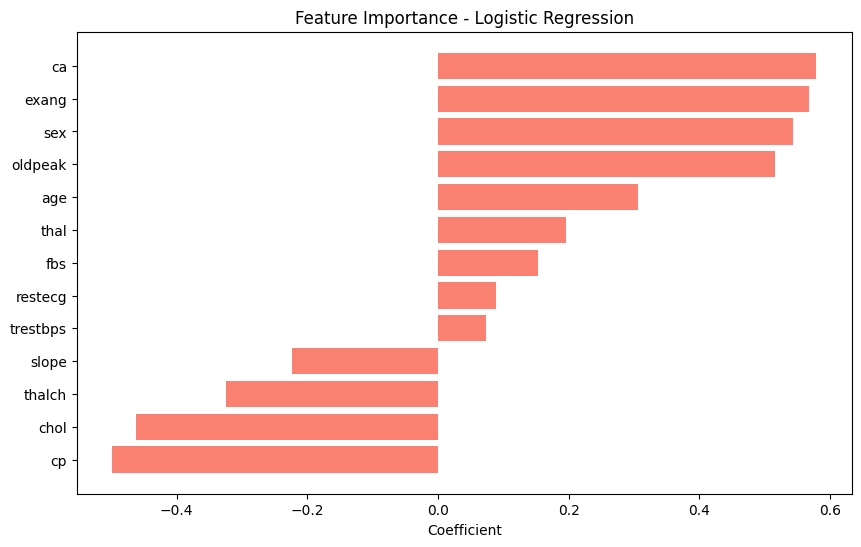

In [72]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='salmon')
plt.xlabel("Coefficient")
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

In [69]:
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

dt_importance

,Feature,Importance
2,cp,0.458337
4,chol,0.175653
0,age,0.096885
9,oldpeak,0.087757
7,thalch,0.067729
1,sex,0.054337
8,exang,0.027128
3,trestbps,0.017572
12,thal,0.012040
6,restecg,0.002562


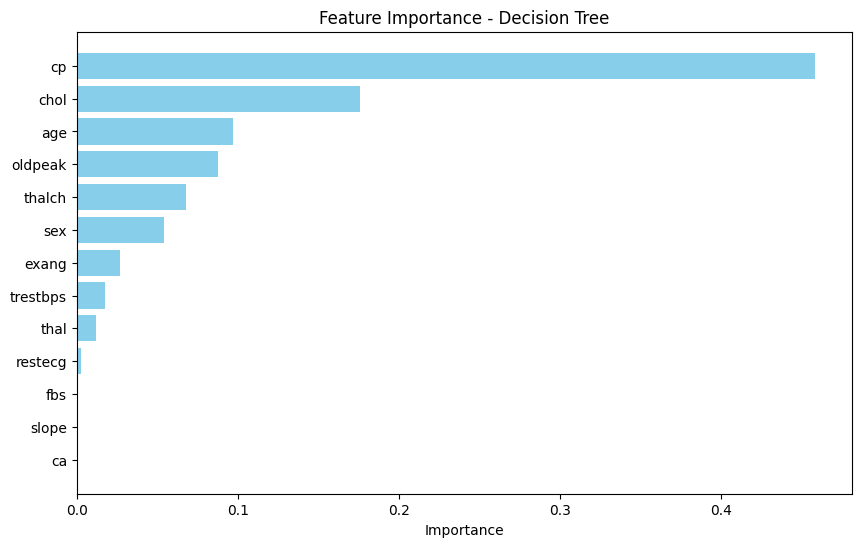

In [71]:
plt.figure(figsize=(10,6))
plt.barh(dt_importance['Feature'], dt_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance - Decision Tree")
plt.gca().invert_yaxis()
plt.show()